# DDPG/TD3/SAC training of baseline with quadratic reward (spinup library)

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
from gym.envs.registration import register

from custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import spinup

from os import path
from scipy.integrate import solve_ivp
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
#from vpython import *
from functools import partial

register(id='gyroscopeenv-v0',entry_point='gym_GyroscopeEnv.envs:GyroscopeEnv')
register(id='gyroscopeintegralenv-v0',entry_point='gym_GyroscopeEnv.envs:GyroscopeIntegralEnv')

## Environment Class and Modules

In [8]:
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.1,'pu2':0.1}
env_int = partial(env_fn,env_name = 'gyroscopeintegralenv-v0',reward_type = 'Quadratic', reward_args = reward_args,ep_len=110)

In [35]:
env = env_int()
obs = env.reset()
obs[0:-2]=[1,0,0,1,0,0,5/180,0,0.9]
obs[-2:]=[0.5,1]
print('obs:' ,obs,'\n\n')
agent_fullpath = 'integral_norm/' + '/pyt_save/model.pt'
agent = torch.load(agent_fullpath)
action = agent.act(torch.as_tensor(obs, dtype=torch.float32))
print('action:',action)


obs: [1.         0.         0.         1.         0.         0.
 0.02777778 0.         0.9        0.         0.        ] 


obs: [-0.404775852, -0.914415939, 0, 0.352234486, 0.935911784, 0, -0.795031486, 0.346152696, -0.21484652, 1, 1] 


action: [-0.04024322 -0.06766874]


In [45]:
obs[-2:]

array([0., 0.])

## Training

#### Integral

In [5]:
# Setup baseline 0
logger_kwargs = dict(output_dir='integral_500epochs', exp_name='integral_500epochs')
seed_b = 0
epochs_b = 500
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Baseline 0 training
spinup.ddpg_pytorch(env_int, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to integral_500epochs/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(<function env_fn at 0x7efdbf0da2f0>, env_name='gyroscopeintegralenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110)",
    "epochs":	500,
    "exp_name":	"integral_500epochs",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7efd8d655cc0>":	{
            "epoch_dict":	{},
            "exp_name":	"integral_500epochs",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"integral_500epochs",
            "output_file":	{
                "<_io.TextIOWrapper name='integral_500epochs/progress.txt' mode='w' encoding='UTF-8'>

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |       -6.25e+03 |
|          StdEpRet |        1.82e+03 |
|          MaxEpRet |       -3.95e+03 |
|          MinEpRet |       -1.03e+04 |
|  AverageTestEpRet |       -8.25e+03 |
|      StdTestEpRet |        2.21e+03 |
|      MaxTestEpRet |       -5.28e+03 |
|      MinTestEpRet |       -1.24e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |            -104 |
|          StdQVals |            61.2 |
|          MaxQVals |            1.23 |
|          MinQVals |            -392 |
|            LossPi |            99.1 |
|             LossQ |        1.17e+03 |
|              Time |            4.89 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -6.81e+03 |
|          StdEpRet |        2.31e+03 |


---------------------------------------
|             Epoch |              11 |
|      AverageEpRet |       -2.65e+03 |
|          StdEpRet |        1.72e+03 |
|          MaxEpRet |            -460 |
|          MinEpRet |       -6.03e+03 |
|  AverageTestEpRet |       -1.67e+03 |
|      StdTestEpRet |             806 |
|      MaxTestEpRet |            -650 |
|      MinTestEpRet |       -3.58e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.81e+04 |
|      AverageQVals |        -1.6e+03 |
|          StdQVals |             921 |
|          MaxQVals |            -145 |
|          MinQVals |       -6.26e+03 |
|            LossPi |        1.57e+03 |
|             LossQ |        2.82e+03 |
|              Time |            82.3 |
---------------------------------------
---------------------------------------
|             Epoch |              12 |
|      AverageEpRet |       -2.34e+03 |
|          StdEpRet |        1.37e+03 |


---------------------------------------
|             Epoch |              21 |
|      AverageEpRet |       -1.24e+03 |
|          StdEpRet |             610 |
|          MaxEpRet |            -349 |
|          MinEpRet |       -2.72e+03 |
|  AverageTestEpRet |       -2.04e+03 |
|      StdTestEpRet |        1.23e+03 |
|      MaxTestEpRet |            -815 |
|      MinTestEpRet |       -5.17e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.46e+04 |
|      AverageQVals |       -1.93e+03 |
|          StdQVals |        1.45e+03 |
|          MaxQVals |             4.4 |
|          MinQVals |       -1.09e+04 |
|            LossPi |        1.91e+03 |
|             LossQ |        3.11e+03 |
|              Time |             161 |
---------------------------------------
---------------------------------------
|             Epoch |              22 |
|      AverageEpRet |        -1.4e+03 |
|          StdEpRet |             930 |


---------------------------------------
|             Epoch |              31 |
|      AverageEpRet |       -1.17e+03 |
|          StdEpRet |             585 |
|          MaxEpRet |           -46.1 |
|          MinEpRet |       -2.41e+03 |
|  AverageTestEpRet |       -1.07e+03 |
|      StdTestEpRet |             701 |
|      MaxTestEpRet |            -166 |
|      MinTestEpRet |       -2.17e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.11e+04 |
|      AverageQVals |       -1.93e+03 |
|          StdQVals |        2.01e+03 |
|          MaxQVals |             484 |
|          MinQVals |       -1.75e+04 |
|            LossPi |         1.9e+03 |
|             LossQ |        3.88e+03 |
|              Time |             240 |
---------------------------------------
---------------------------------------
|             Epoch |              32 |
|      AverageEpRet |       -1.18e+03 |
|          StdEpRet |             791 |


---------------------------------------
|             Epoch |              41 |
|      AverageEpRet |        -1.5e+03 |
|          StdEpRet |        1.21e+03 |
|          MaxEpRet |            -114 |
|          MinEpRet |       -4.31e+03 |
|  AverageTestEpRet |       -2.15e+03 |
|      StdTestEpRet |        1.58e+03 |
|      MaxTestEpRet |            -262 |
|      MinTestEpRet |       -5.67e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.76e+04 |
|      AverageQVals |       -2.06e+03 |
|          StdQVals |        2.67e+03 |
|          MaxQVals |             978 |
|          MinQVals |       -2.73e+04 |
|            LossPi |        2.02e+03 |
|             LossQ |        5.68e+03 |
|              Time |             320 |
---------------------------------------
---------------------------------------
|             Epoch |              42 |
|      AverageEpRet |       -1.93e+03 |
|          StdEpRet |        1.26e+03 |


---------------------------------------
|             Epoch |              51 |
|      AverageEpRet |       -1.34e+03 |
|          StdEpRet |        1.32e+03 |
|          MaxEpRet |            -307 |
|          MinEpRet |       -5.85e+03 |
|  AverageTestEpRet |       -1.85e+03 |
|      StdTestEpRet |        1.22e+03 |
|      MaxTestEpRet |            -279 |
|      MinTestEpRet |       -3.89e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.41e+04 |
|      AverageQVals |       -2.42e+03 |
|          StdQVals |        3.63e+03 |
|          MaxQVals |        1.51e+03 |
|          MinQVals |          -4e+04 |
|            LossPi |        2.38e+03 |
|             LossQ |        9.26e+03 |
|              Time |             399 |
---------------------------------------
---------------------------------------
|             Epoch |              52 |
|      AverageEpRet |       -1.65e+03 |
|          StdEpRet |        1.02e+03 |


---------------------------------------
|             Epoch |              61 |
|      AverageEpRet |        -2.4e+03 |
|          StdEpRet |        1.86e+03 |
|          MaxEpRet |           -90.5 |
|          MinEpRet |       -7.73e+03 |
|  AverageTestEpRet |        -1.9e+03 |
|      StdTestEpRet |        1.91e+03 |
|      MaxTestEpRet |            -157 |
|      MinTestEpRet |       -6.87e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.01e+05 |
|      AverageQVals |        -2.7e+03 |
|          StdQVals |        4.88e+03 |
|          MaxQVals |        2.29e+03 |
|          MinQVals |       -5.63e+04 |
|            LossPi |        2.65e+03 |
|             LossQ |        1.56e+04 |
|              Time |             477 |
---------------------------------------
---------------------------------------
|             Epoch |              62 |
|      AverageEpRet |        -1.5e+03 |
|          StdEpRet |        1.32e+03 |


---------------------------------------
|             Epoch |              71 |
|      AverageEpRet |        -2.3e+03 |
|          StdEpRet |        1.62e+03 |
|          MaxEpRet |            -376 |
|          MinEpRet |       -6.93e+03 |
|  AverageTestEpRet |        -1.8e+03 |
|      StdTestEpRet |        1.14e+03 |
|      MaxTestEpRet |            -291 |
|      MinTestEpRet |       -3.58e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.17e+05 |
|      AverageQVals |       -3.22e+03 |
|          StdQVals |        6.57e+03 |
|          MaxQVals |        3.11e+03 |
|          MinQVals |       -8.49e+04 |
|            LossPi |        3.15e+03 |
|             LossQ |        2.88e+04 |
|              Time |             567 |
---------------------------------------
---------------------------------------
|             Epoch |              72 |
|      AverageEpRet |       -2.13e+03 |
|          StdEpRet |        1.82e+03 |


---------------------------------------
|             Epoch |              81 |
|      AverageEpRet |        -2.5e+03 |
|          StdEpRet |        1.51e+03 |
|          MaxEpRet |            -111 |
|          MinEpRet |       -5.18e+03 |
|  AverageTestEpRet |       -1.96e+03 |
|      StdTestEpRet |        2.31e+03 |
|      MaxTestEpRet |            -168 |
|      MinTestEpRet |       -8.03e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.34e+05 |
|      AverageQVals |       -3.81e+03 |
|          StdQVals |         8.6e+03 |
|          MaxQVals |        4.04e+03 |
|          MinQVals |       -1.16e+05 |
|            LossPi |        3.72e+03 |
|             LossQ |        4.99e+04 |
|              Time |             646 |
---------------------------------------
---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |       -2.49e+03 |
|          StdEpRet |        1.36e+03 |


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |       -1.81e+03 |
|          StdEpRet |         1.3e+03 |
|          MaxEpRet |            -266 |
|          MinEpRet |       -4.65e+03 |
|  AverageTestEpRet |       -1.46e+03 |
|      StdTestEpRet |        1.41e+03 |
|      MaxTestEpRet |            -216 |
|      MinTestEpRet |       -4.92e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|      AverageQVals |       -4.65e+03 |
|          StdQVals |        1.18e+04 |
|          MaxQVals |        5.24e+03 |
|          MinQVals |        -1.9e+05 |
|            LossPi |        4.54e+03 |
|             LossQ |        8.59e+04 |
|              Time |             725 |
---------------------------------------
---------------------------------------
|             Epoch |              92 |
|      AverageEpRet |       -2.18e+03 |
|          StdEpRet |        1.24e+03 |


---------------------------------------
|             Epoch |             101 |
|      AverageEpRet |       -1.33e+03 |
|          StdEpRet |        1.03e+03 |
|          MaxEpRet |            -251 |
|          MinEpRet |        -3.5e+03 |
|  AverageTestEpRet |       -1.97e+03 |
|      StdTestEpRet |        1.25e+03 |
|      MaxTestEpRet |            -524 |
|      MinTestEpRet |       -4.48e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.67e+05 |
|      AverageQVals |       -5.92e+03 |
|          StdQVals |        1.55e+04 |
|          MaxQVals |        6.73e+03 |
|          MinQVals |       -2.82e+05 |
|            LossPi |         5.8e+03 |
|             LossQ |        1.51e+05 |
|              Time |             804 |
---------------------------------------
---------------------------------------
|             Epoch |             102 |
|      AverageEpRet |       -3.09e+03 |
|          StdEpRet |        2.58e+03 |


---------------------------------------
|             Epoch |             111 |
|      AverageEpRet |       -2.41e+03 |
|          StdEpRet |        1.81e+03 |
|          MaxEpRet |            -304 |
|          MinEpRet |       -7.05e+03 |
|  AverageTestEpRet |       -3.01e+03 |
|      StdTestEpRet |        2.49e+03 |
|      MaxTestEpRet |            -379 |
|      MinTestEpRet |       -8.46e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.83e+05 |
|      AverageQVals |       -7.12e+03 |
|          StdQVals |        1.99e+04 |
|          MaxQVals |        7.84e+03 |
|          MinQVals |       -4.01e+05 |
|            LossPi |        6.97e+03 |
|             LossQ |        2.46e+05 |
|              Time |             884 |
---------------------------------------
---------------------------------------
|             Epoch |             112 |
|      AverageEpRet |        -2.3e+03 |
|          StdEpRet |        1.39e+03 |


---------------------------------------
|             Epoch |             121 |
|      AverageEpRet |       -3.32e+03 |
|          StdEpRet |        2.32e+03 |
|          MaxEpRet |            -527 |
|          MinEpRet |       -8.22e+03 |
|  AverageTestEpRet |       -2.43e+03 |
|      StdTestEpRet |        1.29e+03 |
|      MaxTestEpRet |            -591 |
|      MinTestEpRet |       -4.77e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |           2e+05 |
|      AverageQVals |       -8.42e+03 |
|          StdQVals |        2.54e+04 |
|          MaxQVals |         9.2e+03 |
|          MinQVals |       -5.21e+05 |
|            LossPi |        8.24e+03 |
|             LossQ |        4.01e+05 |
|              Time |             962 |
---------------------------------------
---------------------------------------
|             Epoch |             122 |
|      AverageEpRet |       -2.98e+03 |
|          StdEpRet |        1.65e+03 |


---------------------------------------
|             Epoch |             131 |
|      AverageEpRet |       -2.98e+03 |
|          StdEpRet |        1.43e+03 |
|          MaxEpRet |       -1.29e+03 |
|          MinEpRet |       -7.37e+03 |
|  AverageTestEpRet |       -3.35e+03 |
|      StdTestEpRet |        1.43e+03 |
|      MaxTestEpRet |            -923 |
|      MinTestEpRet |       -6.52e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.16e+05 |
|      AverageQVals |       -1.05e+04 |
|          StdQVals |        3.33e+04 |
|          MaxQVals |        1.12e+04 |
|          MinQVals |       -7.09e+05 |
|            LossPi |        1.03e+04 |
|             LossQ |        7.24e+05 |
|              Time |        1.04e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             132 |
|      AverageEpRet |       -3.22e+03 |
|          StdEpRet |        1.97e+03 |


---------------------------------------
|             Epoch |             141 |
|      AverageEpRet |       -2.07e+03 |
|          StdEpRet |        1.08e+03 |
|          MaxEpRet |            -536 |
|          MinEpRet |       -4.92e+03 |
|  AverageTestEpRet |       -3.87e+03 |
|      StdTestEpRet |        1.63e+03 |
|      MaxTestEpRet |       -1.44e+03 |
|      MinTestEpRet |       -6.36e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.33e+05 |
|      AverageQVals |       -1.47e+04 |
|          StdQVals |        4.67e+04 |
|          MaxQVals |        1.37e+04 |
|          MinQVals |       -9.24e+05 |
|            LossPi |        1.44e+04 |
|             LossQ |        1.36e+06 |
|              Time |        1.12e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             142 |
|      AverageEpRet |       -1.84e+03 |
|          StdEpRet |        1.19e+03 |


---------------------------------------
|             Epoch |             151 |
|      AverageEpRet |       -2.81e+03 |
|          StdEpRet |        2.26e+03 |
|          MaxEpRet |            -331 |
|          MinEpRet |       -7.29e+03 |
|  AverageTestEpRet |       -3.43e+03 |
|      StdTestEpRet |             692 |
|      MaxTestEpRet |        -2.3e+03 |
|      MinTestEpRet |       -4.79e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.49e+05 |
|      AverageQVals |       -2.14e+04 |
|          StdQVals |        6.39e+04 |
|          MaxQVals |        1.76e+04 |
|          MinQVals |       -1.23e+06 |
|            LossPi |         2.1e+04 |
|             LossQ |         2.7e+06 |
|              Time |         1.2e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             152 |
|      AverageEpRet |       -3.25e+03 |
|          StdEpRet |        1.31e+03 |


---------------------------------------
|             Epoch |             161 |
|      AverageEpRet |       -4.06e+03 |
|          StdEpRet |        3.02e+03 |
|          MaxEpRet |            -599 |
|          MinEpRet |       -1.04e+04 |
|  AverageTestEpRet |       -3.01e+03 |
|      StdTestEpRet |        1.57e+03 |
|      MaxTestEpRet |            -878 |
|      MinTestEpRet |       -5.23e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.66e+05 |
|      AverageQVals |       -3.15e+04 |
|          StdQVals |        8.92e+04 |
|          MaxQVals |        2.27e+04 |
|          MinQVals |       -1.73e+06 |
|            LossPi |         3.1e+04 |
|             LossQ |         5.9e+06 |
|              Time |        1.28e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             162 |
|      AverageEpRet |       -3.09e+03 |
|          StdEpRet |        1.26e+03 |


---------------------------------------
|             Epoch |             171 |
|      AverageEpRet |       -3.73e+03 |
|          StdEpRet |        1.76e+03 |
|          MaxEpRet |            -513 |
|          MinEpRet |       -6.89e+03 |
|  AverageTestEpRet |       -2.96e+03 |
|      StdTestEpRet |        1.87e+03 |
|      MaxTestEpRet |            -658 |
|      MinTestEpRet |       -6.55e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.82e+05 |
|      AverageQVals |       -5.24e+04 |
|          StdQVals |        1.33e+05 |
|          MaxQVals |        2.86e+04 |
|          MinQVals |       -2.49e+06 |
|            LossPi |        5.17e+04 |
|             LossQ |        1.37e+07 |
|              Time |        1.36e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             172 |
|      AverageEpRet |       -3.59e+03 |
|          StdEpRet |        2.01e+03 |


---------------------------------------
|             Epoch |             181 |
|      AverageEpRet |       -4.48e+03 |
|          StdEpRet |        2.32e+03 |
|          MaxEpRet |       -1.95e+03 |
|          MinEpRet |       -9.66e+03 |
|  AverageTestEpRet |       -2.17e+03 |
|      StdTestEpRet |        1.66e+03 |
|      MaxTestEpRet |            -388 |
|      MinTestEpRet |       -4.67e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        2.99e+05 |
|      AverageQVals |       -8.42e+04 |
|          StdQVals |        1.97e+05 |
|          MaxQVals |        3.52e+04 |
|          MinQVals |       -4.18e+06 |
|            LossPi |        8.33e+04 |
|             LossQ |        3.11e+07 |
|              Time |        1.44e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             182 |
|      AverageEpRet |       -2.78e+03 |
|          StdEpRet |        2.17e+03 |


---------------------------------------
|             Epoch |             191 |
|      AverageEpRet |        -4.2e+03 |
|          StdEpRet |        2.45e+03 |
|          MaxEpRet |            -292 |
|          MinEpRet |       -9.74e+03 |
|  AverageTestEpRet |       -3.33e+03 |
|      StdTestEpRet |        2.16e+03 |
|      MaxTestEpRet |            -515 |
|      MinTestEpRet |       -7.72e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.15e+05 |
|      AverageQVals |       -1.42e+05 |
|          StdQVals |        3.01e+05 |
|          MaxQVals |        4.15e+04 |
|          MinQVals |          -6e+06 |
|            LossPi |        1.41e+05 |
|             LossQ |        7.76e+07 |
|              Time |        1.52e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             192 |
|      AverageEpRet |       -3.44e+03 |
|          StdEpRet |        1.72e+03 |


---------------------------------------
|             Epoch |             201 |
|      AverageEpRet |        -4.8e+03 |
|          StdEpRet |         2.8e+03 |
|          MaxEpRet |       -1.28e+03 |
|          MinEpRet |       -1.13e+04 |
|  AverageTestEpRet |       -3.16e+03 |
|      StdTestEpRet |        2.65e+03 |
|      MaxTestEpRet |           -67.5 |
|      MinTestEpRet |       -7.48e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.32e+05 |
|      AverageQVals |       -2.22e+05 |
|          StdQVals |        4.21e+05 |
|          MaxQVals |        4.78e+04 |
|          MinQVals |          -8e+06 |
|            LossPi |         2.2e+05 |
|             LossQ |         1.8e+08 |
|              Time |         1.6e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             202 |
|      AverageEpRet |       -4.24e+03 |
|          StdEpRet |        2.83e+03 |


---------------------------------------
|             Epoch |             211 |
|      AverageEpRet |       -4.98e+03 |
|          StdEpRet |        2.42e+03 |
|          MaxEpRet |            -151 |
|          MinEpRet |       -1.06e+04 |
|  AverageTestEpRet |        -5.4e+03 |
|      StdTestEpRet |        1.59e+03 |
|      MaxTestEpRet |       -2.57e+03 |
|      MinTestEpRet |       -7.91e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.48e+05 |
|      AverageQVals |       -3.31e+05 |
|          StdQVals |        5.91e+05 |
|          MaxQVals |        4.74e+04 |
|          MinQVals |       -1.12e+07 |
|            LossPi |        3.29e+05 |
|             LossQ |        3.73e+08 |
|              Time |        1.68e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             212 |
|      AverageEpRet |       -5.41e+03 |
|          StdEpRet |        1.83e+03 |


---------------------------------------
|             Epoch |             221 |
|      AverageEpRet |       -5.19e+03 |
|          StdEpRet |        1.79e+03 |
|          MaxEpRet |            -204 |
|          MinEpRet |       -7.79e+03 |
|  AverageTestEpRet |       -6.84e+03 |
|      StdTestEpRet |        1.93e+03 |
|      MaxTestEpRet |       -4.13e+03 |
|      MinTestEpRet |          -1e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.65e+05 |
|      AverageQVals |       -4.73e+05 |
|          StdQVals |        7.95e+05 |
|          MaxQVals |        4.65e+04 |
|          MinQVals |       -1.49e+07 |
|            LossPi |         4.7e+05 |
|             LossQ |        7.35e+08 |
|              Time |        1.76e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             222 |
|      AverageEpRet |        -6.6e+03 |
|          StdEpRet |         1.5e+03 |


---------------------------------------
|             Epoch |             231 |
|      AverageEpRet |        -6.7e+03 |
|          StdEpRet |        2.29e+03 |
|          MaxEpRet |       -3.82e+03 |
|          MinEpRet |       -1.17e+04 |
|  AverageTestEpRet |       -6.87e+03 |
|      StdTestEpRet |        2.11e+03 |
|      MaxTestEpRet |       -3.68e+03 |
|      MinTestEpRet |        -1.1e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.81e+05 |
|      AverageQVals |       -6.06e+05 |
|          StdQVals |        1.04e+06 |
|          MaxQVals |        4.68e+04 |
|          MinQVals |       -1.95e+07 |
|            LossPi |        6.01e+05 |
|             LossQ |        1.39e+09 |
|              Time |        1.84e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             232 |
|      AverageEpRet |       -6.96e+03 |
|          StdEpRet |        2.32e+03 |


---------------------------------------
|             Epoch |             241 |
|      AverageEpRet |       -7.78e+03 |
|          StdEpRet |        1.55e+03 |
|          MaxEpRet |       -4.81e+03 |
|          MinEpRet |       -1.09e+04 |
|  AverageTestEpRet |       -7.32e+03 |
|      StdTestEpRet |        1.73e+03 |
|      MaxTestEpRet |        -4.2e+03 |
|      MinTestEpRet |       -1.09e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.98e+05 |
|      AverageQVals |       -8.04e+05 |
|          StdQVals |         1.4e+06 |
|          MaxQVals |        4.58e+04 |
|          MinQVals |       -2.52e+07 |
|            LossPi |           8e+05 |
|             LossQ |        2.62e+09 |
|              Time |        1.92e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             242 |
|      AverageEpRet |       -7.88e+03 |
|          StdEpRet |        2.63e+03 |


---------------------------------------
|             Epoch |             251 |
|      AverageEpRet |        -7.5e+03 |
|          StdEpRet |        2.61e+03 |
|          MaxEpRet |        -3.8e+03 |
|          MinEpRet |        -1.3e+04 |
|  AverageTestEpRet |       -7.38e+03 |
|      StdTestEpRet |        2.05e+03 |
|      MaxTestEpRet |       -4.53e+03 |
|      MinTestEpRet |       -1.17e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.14e+05 |
|      AverageQVals |       -1.04e+06 |
|          StdQVals |        1.78e+06 |
|          MaxQVals |        4.21e+04 |
|          MinQVals |       -3.08e+07 |
|            LossPi |        1.04e+06 |
|             LossQ |        4.64e+09 |
|              Time |           2e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             252 |
|      AverageEpRet |       -7.32e+03 |
|          StdEpRet |        1.39e+03 |


---------------------------------------
|             Epoch |             261 |
|      AverageEpRet |       -7.21e+03 |
|          StdEpRet |        1.89e+03 |
|          MaxEpRet |       -4.96e+03 |
|          MinEpRet |       -1.17e+04 |
|  AverageTestEpRet |        -6.5e+03 |
|      StdTestEpRet |        2.05e+03 |
|      MaxTestEpRet |       -3.94e+03 |
|      MinTestEpRet |       -1.07e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.31e+05 |
|      AverageQVals |       -1.38e+06 |
|          StdQVals |        2.29e+06 |
|          MaxQVals |        4.24e+04 |
|          MinQVals |       -3.97e+07 |
|            LossPi |        1.37e+06 |
|             LossQ |        8.25e+09 |
|              Time |        2.08e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             262 |
|      AverageEpRet |       -7.19e+03 |
|          StdEpRet |        1.26e+03 |


---------------------------------------
|             Epoch |             271 |
|      AverageEpRet |       -6.84e+03 |
|          StdEpRet |        1.85e+03 |
|          MaxEpRet |       -2.71e+03 |
|          MinEpRet |       -1.13e+04 |
|  AverageTestEpRet |       -8.24e+03 |
|      StdTestEpRet |        1.62e+03 |
|      MaxTestEpRet |       -4.82e+03 |
|      MinTestEpRet |       -1.08e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.47e+05 |
|      AverageQVals |       -1.82e+06 |
|          StdQVals |        2.97e+06 |
|          MaxQVals |        3.21e+04 |
|          MinQVals |       -5.04e+07 |
|            LossPi |        1.81e+06 |
|             LossQ |        1.42e+10 |
|              Time |        2.16e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             272 |
|      AverageEpRet |       -6.85e+03 |
|          StdEpRet |        1.84e+03 |


---------------------------------------
|             Epoch |             281 |
|      AverageEpRet |       -7.47e+03 |
|          StdEpRet |        1.84e+03 |
|          MaxEpRet |       -4.52e+03 |
|          MinEpRet |       -1.06e+04 |
|  AverageTestEpRet |       -8.16e+03 |
|      StdTestEpRet |        1.52e+03 |
|      MaxTestEpRet |        -5.7e+03 |
|      MinTestEpRet |       -1.05e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.64e+05 |
|      AverageQVals |        -2.3e+06 |
|          StdQVals |        3.67e+06 |
|          MaxQVals |        2.75e+04 |
|          MinQVals |       -5.87e+07 |
|            LossPi |        2.29e+06 |
|             LossQ |        2.22e+10 |
|              Time |        2.24e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             282 |
|      AverageEpRet |       -7.19e+03 |
|          StdEpRet |        2.25e+03 |


---------------------------------------
|             Epoch |             291 |
|      AverageEpRet |       -7.41e+03 |
|          StdEpRet |        1.94e+03 |
|          MaxEpRet |       -4.07e+03 |
|          MinEpRet |       -1.17e+04 |
|  AverageTestEpRet |       -7.72e+03 |
|      StdTestEpRet |        2.52e+03 |
|      MaxTestEpRet |       -4.05e+03 |
|      MinTestEpRet |        -1.2e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         4.8e+05 |
|      AverageQVals |       -2.83e+06 |
|          StdQVals |        4.55e+06 |
|          MaxQVals |        2.59e+04 |
|          MinQVals |       -7.06e+07 |
|            LossPi |        2.82e+06 |
|             LossQ |        3.37e+10 |
|              Time |        2.32e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             292 |
|      AverageEpRet |       -7.33e+03 |
|          StdEpRet |         1.8e+03 |


---------------------------------------
|             Epoch |             301 |
|      AverageEpRet |       -7.68e+03 |
|          StdEpRet |        1.44e+03 |
|          MaxEpRet |       -4.46e+03 |
|          MinEpRet |       -1.06e+04 |
|  AverageTestEpRet |       -7.93e+03 |
|      StdTestEpRet |        2.67e+03 |
|      MaxTestEpRet |       -3.56e+03 |
|      MinTestEpRet |       -1.15e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        4.97e+05 |
|      AverageQVals |       -3.49e+06 |
|          StdQVals |        5.66e+06 |
|          MaxQVals |       -6.18e+03 |
|          MinQVals |       -9.14e+07 |
|            LossPi |        3.47e+06 |
|             LossQ |        5.06e+10 |
|              Time |         2.4e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             302 |
|      AverageEpRet |       -8.28e+03 |
|          StdEpRet |        2.19e+03 |


---------------------------------------
|             Epoch |             311 |
|      AverageEpRet |       -8.04e+03 |
|          StdEpRet |        1.58e+03 |
|          MaxEpRet |       -5.32e+03 |
|          MinEpRet |       -1.11e+04 |
|  AverageTestEpRet |       -7.11e+03 |
|      StdTestEpRet |        1.83e+03 |
|      MaxTestEpRet |       -4.78e+03 |
|      MinTestEpRet |       -1.06e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.13e+05 |
|      AverageQVals |       -4.36e+06 |
|          StdQVals |        7.18e+06 |
|          MaxQVals |       -1.65e+04 |
|          MinQVals |       -1.12e+08 |
|            LossPi |        4.34e+06 |
|             LossQ |        7.79e+10 |
|              Time |        2.48e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             312 |
|      AverageEpRet |       -8.34e+03 |
|          StdEpRet |        2.04e+03 |


---------------------------------------
|             Epoch |             321 |
|      AverageEpRet |       -7.45e+03 |
|          StdEpRet |        1.33e+03 |
|          MaxEpRet |       -5.41e+03 |
|          MinEpRet |       -1.07e+04 |
|  AverageTestEpRet |       -6.68e+03 |
|      StdTestEpRet |        2.46e+03 |
|      MaxTestEpRet |       -4.02e+03 |
|      MinTestEpRet |       -1.26e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         5.3e+05 |
|      AverageQVals |       -5.37e+06 |
|          StdQVals |        8.96e+06 |
|          MaxQVals |        1.04e+04 |
|          MinQVals |       -1.34e+08 |
|            LossPi |        5.35e+06 |
|             LossQ |        1.19e+11 |
|              Time |        2.56e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             322 |
|      AverageEpRet |       -8.11e+03 |
|          StdEpRet |        1.65e+03 |


---------------------------------------
|             Epoch |             331 |
|      AverageEpRet |       -6.24e+03 |
|          StdEpRet |         1.7e+03 |
|          MaxEpRet |        -3.8e+03 |
|          MinEpRet |          -1e+04 |
|  AverageTestEpRet |       -8.12e+03 |
|      StdTestEpRet |        1.96e+03 |
|      MaxTestEpRet |       -5.43e+03 |
|      MinTestEpRet |       -1.07e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.46e+05 |
|      AverageQVals |       -6.71e+06 |
|          StdQVals |        1.14e+07 |
|          MaxQVals |       -4.77e+04 |
|          MinQVals |        -1.7e+08 |
|            LossPi |        6.69e+06 |
|             LossQ |        1.86e+11 |
|              Time |        2.64e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             332 |
|      AverageEpRet |       -6.54e+03 |
|          StdEpRet |        1.77e+03 |


---------------------------------------
|             Epoch |             341 |
|      AverageEpRet |       -6.69e+03 |
|          StdEpRet |        1.29e+03 |
|          MaxEpRet |       -4.82e+03 |
|          MinEpRet |        -9.5e+03 |
|  AverageTestEpRet |       -7.73e+03 |
|      StdTestEpRet |        2.99e+03 |
|      MaxTestEpRet |        -1.4e+03 |
|      MinTestEpRet |       -1.23e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.63e+05 |
|      AverageQVals |       -8.35e+06 |
|          StdQVals |        1.42e+07 |
|          MaxQVals |       -1.01e+05 |
|          MinQVals |       -2.05e+08 |
|            LossPi |        8.32e+06 |
|             LossQ |        2.82e+11 |
|              Time |        2.72e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             342 |
|      AverageEpRet |       -7.94e+03 |
|          StdEpRet |        1.94e+03 |


---------------------------------------
|             Epoch |             351 |
|      AverageEpRet |       -7.77e+03 |
|          StdEpRet |         2.3e+03 |
|          MaxEpRet |       -4.21e+03 |
|          MinEpRet |       -1.19e+04 |
|  AverageTestEpRet |       -8.03e+03 |
|      StdTestEpRet |        2.22e+03 |
|      MaxTestEpRet |       -4.99e+03 |
|      MinTestEpRet |       -1.18e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.79e+05 |
|      AverageQVals |       -1.04e+07 |
|          StdQVals |        1.76e+07 |
|          MaxQVals |       -1.15e+05 |
|          MinQVals |       -2.48e+08 |
|            LossPi |        1.04e+07 |
|             LossQ |        4.51e+11 |
|              Time |         2.8e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             352 |
|      AverageEpRet |       -6.64e+03 |
|          StdEpRet |        1.92e+03 |


---------------------------------------
|             Epoch |             361 |
|      AverageEpRet |        -7.7e+03 |
|          StdEpRet |        1.88e+03 |
|          MaxEpRet |       -4.28e+03 |
|          MinEpRet |       -1.12e+04 |
|  AverageTestEpRet |       -7.92e+03 |
|      StdTestEpRet |        2.06e+03 |
|      MaxTestEpRet |       -4.88e+03 |
|      MinTestEpRet |       -1.09e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.96e+05 |
|      AverageQVals |       -1.31e+07 |
|          StdQVals |        2.21e+07 |
|          MaxQVals |       -2.01e+05 |
|          MinQVals |       -2.98e+08 |
|            LossPi |         1.3e+07 |
|             LossQ |        6.82e+11 |
|              Time |        2.89e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             362 |
|      AverageEpRet |       -6.69e+03 |
|          StdEpRet |        2.06e+03 |


---------------------------------------
|             Epoch |             371 |
|      AverageEpRet |       -7.36e+03 |
|          StdEpRet |        2.22e+03 |
|          MaxEpRet |       -3.93e+03 |
|          MinEpRet |        -1.2e+04 |
|  AverageTestEpRet |       -6.54e+03 |
|      StdTestEpRet |         1.4e+03 |
|      MaxTestEpRet |       -4.23e+03 |
|      MinTestEpRet |       -8.63e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.12e+05 |
|      AverageQVals |       -1.61e+07 |
|          StdQVals |        2.71e+07 |
|          MaxQVals |       -2.71e+05 |
|          MinQVals |       -3.59e+08 |
|            LossPi |        1.61e+07 |
|             LossQ |        1.02e+12 |
|              Time |        2.96e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             372 |
|      AverageEpRet |       -7.02e+03 |
|          StdEpRet |        1.76e+03 |


---------------------------------------
|             Epoch |             381 |
|      AverageEpRet |       -6.42e+03 |
|          StdEpRet |         2.5e+03 |
|          MaxEpRet |        -3.8e+03 |
|          MinEpRet |        -1.2e+04 |
|  AverageTestEpRet |        -7.6e+03 |
|      StdTestEpRet |        1.72e+03 |
|      MaxTestEpRet |       -5.73e+03 |
|      MinTestEpRet |        -1.1e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.29e+05 |
|      AverageQVals |          -2e+07 |
|          StdQVals |        3.33e+07 |
|          MaxQVals |        -4.9e+05 |
|          MinQVals |       -4.24e+08 |
|            LossPi |        1.99e+07 |
|             LossQ |        1.53e+12 |
|              Time |        3.04e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             382 |
|      AverageEpRet |       -6.46e+03 |
|          StdEpRet |        2.37e+03 |


---------------------------------------
|             Epoch |             391 |
|      AverageEpRet |       -6.44e+03 |
|          StdEpRet |        1.74e+03 |
|          MaxEpRet |       -4.15e+03 |
|          MinEpRet |       -1.07e+04 |
|  AverageTestEpRet |       -5.73e+03 |
|      StdTestEpRet |        1.42e+03 |
|      MaxTestEpRet |       -3.11e+03 |
|      MinTestEpRet |       -8.62e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.45e+05 |
|      AverageQVals |        -2.4e+07 |
|          StdQVals |        3.93e+07 |
|          MaxQVals |       -5.94e+05 |
|          MinQVals |       -4.98e+08 |
|            LossPi |         2.4e+07 |
|             LossQ |        2.24e+12 |
|              Time |        3.13e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             392 |
|      AverageEpRet |       -8.02e+03 |
|          StdEpRet |        2.03e+03 |


---------------------------------------
|             Epoch |             401 |
|      AverageEpRet |       -6.52e+03 |
|          StdEpRet |        1.11e+03 |
|          MaxEpRet |       -3.88e+03 |
|          MinEpRet |       -7.87e+03 |
|  AverageTestEpRet |       -6.08e+03 |
|      StdTestEpRet |        1.81e+03 |
|      MaxTestEpRet |       -2.97e+03 |
|      MinTestEpRet |       -8.03e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.62e+05 |
|      AverageQVals |       -2.89e+07 |
|          StdQVals |        4.64e+07 |
|          MaxQVals |       -8.41e+05 |
|          MinQVals |       -5.83e+08 |
|            LossPi |        2.88e+07 |
|             LossQ |        3.17e+12 |
|              Time |        3.21e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             402 |
|      AverageEpRet |       -6.83e+03 |
|          StdEpRet |        1.74e+03 |


---------------------------------------
|             Epoch |             411 |
|      AverageEpRet |       -7.35e+03 |
|          StdEpRet |        2.07e+03 |
|          MaxEpRet |        -3.2e+03 |
|          MinEpRet |       -1.18e+04 |
|  AverageTestEpRet |       -5.72e+03 |
|      StdTestEpRet |         1.8e+03 |
|      MaxTestEpRet |       -2.33e+03 |
|      MinTestEpRet |       -7.43e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.78e+05 |
|      AverageQVals |       -3.44e+07 |
|          StdQVals |        5.46e+07 |
|          MaxQVals |       -1.05e+06 |
|          MinQVals |       -6.68e+08 |
|            LossPi |        3.43e+07 |
|             LossQ |        4.42e+12 |
|              Time |        3.29e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             412 |
|      AverageEpRet |       -6.93e+03 |
|          StdEpRet |        2.01e+03 |


---------------------------------------
|             Epoch |             421 |
|      AverageEpRet |       -7.28e+03 |
|          StdEpRet |        1.42e+03 |
|          MaxEpRet |        -5.1e+03 |
|          MinEpRet |       -1.01e+04 |
|  AverageTestEpRet |       -6.29e+03 |
|      StdTestEpRet |             980 |
|      MaxTestEpRet |       -5.03e+03 |
|      MinTestEpRet |       -8.17e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.95e+05 |
|      AverageQVals |       -3.99e+07 |
|          StdQVals |        6.14e+07 |
|          MaxQVals |        -1.5e+06 |
|          MinQVals |       -7.58e+08 |
|            LossPi |        3.99e+07 |
|             LossQ |        5.87e+12 |
|              Time |        3.37e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             422 |
|      AverageEpRet |       -7.04e+03 |
|          StdEpRet |        1.67e+03 |


---------------------------------------
|             Epoch |             431 |
|      AverageEpRet |       -8.17e+03 |
|          StdEpRet |        2.08e+03 |
|          MaxEpRet |       -2.61e+03 |
|          MinEpRet |       -1.09e+04 |
|  AverageTestEpRet |       -7.37e+03 |
|      StdTestEpRet |        1.04e+03 |
|      MaxTestEpRet |       -5.51e+03 |
|      MinTestEpRet |       -8.51e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.11e+05 |
|      AverageQVals |       -4.69e+07 |
|          StdQVals |        7.09e+07 |
|          MaxQVals |       -1.72e+06 |
|          MinQVals |       -8.65e+08 |
|            LossPi |        4.69e+07 |
|             LossQ |        7.72e+12 |
|              Time |        3.45e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             432 |
|      AverageEpRet |       -7.34e+03 |
|          StdEpRet |        1.84e+03 |


---------------------------------------
|             Epoch |             441 |
|      AverageEpRet |        -6.9e+03 |
|          StdEpRet |        1.51e+03 |
|          MaxEpRet |       -3.76e+03 |
|          MinEpRet |        -9.8e+03 |
|  AverageTestEpRet |       -7.24e+03 |
|      StdTestEpRet |        2.27e+03 |
|      MaxTestEpRet |       -3.84e+03 |
|      MinTestEpRet |       -1.16e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.28e+05 |
|      AverageQVals |       -5.36e+07 |
|          StdQVals |        7.94e+07 |
|          MaxQVals |       -2.26e+06 |
|          MinQVals |       -9.67e+08 |
|            LossPi |        5.35e+07 |
|             LossQ |        1.01e+13 |
|              Time |        3.54e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             442 |
|      AverageEpRet |       -7.35e+03 |
|          StdEpRet |        2.08e+03 |


---------------------------------------
|             Epoch |             451 |
|      AverageEpRet |        -5.6e+03 |
|          StdEpRet |        1.13e+03 |
|          MaxEpRet |       -4.26e+03 |
|          MinEpRet |       -7.58e+03 |
|  AverageTestEpRet |          -6e+03 |
|      StdTestEpRet |        1.39e+03 |
|      MaxTestEpRet |       -4.16e+03 |
|      MinTestEpRet |       -7.97e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.44e+05 |
|      AverageQVals |       -6.16e+07 |
|          StdQVals |        9.03e+07 |
|          MaxQVals |       -3.13e+06 |
|          MinQVals |       -1.08e+09 |
|            LossPi |        6.15e+07 |
|             LossQ |         1.3e+13 |
|              Time |        3.62e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             452 |
|      AverageEpRet |       -6.65e+03 |
|          StdEpRet |        2.33e+03 |


---------------------------------------
|             Epoch |             461 |
|      AverageEpRet |       -6.56e+03 |
|          StdEpRet |        2.33e+03 |
|          MaxEpRet |       -3.22e+03 |
|          MinEpRet |       -1.21e+04 |
|  AverageTestEpRet |        -5.7e+03 |
|      StdTestEpRet |        2.11e+03 |
|      MaxTestEpRet |       -3.04e+03 |
|      MinTestEpRet |        -1.1e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.61e+05 |
|      AverageQVals |       -7.12e+07 |
|          StdQVals |        1.04e+08 |
|          MaxQVals |       -3.78e+06 |
|          MinQVals |       -1.21e+09 |
|            LossPi |        7.11e+07 |
|             LossQ |        1.65e+13 |
|              Time |         3.7e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             462 |
|      AverageEpRet |       -7.08e+03 |
|          StdEpRet |        2.28e+03 |


---------------------------------------
|             Epoch |             471 |
|      AverageEpRet |       -6.99e+03 |
|          StdEpRet |        1.75e+03 |
|          MaxEpRet |       -4.48e+03 |
|          MinEpRet |       -9.93e+03 |
|  AverageTestEpRet |        -6.8e+03 |
|      StdTestEpRet |        1.34e+03 |
|      MaxTestEpRet |       -4.16e+03 |
|      MinTestEpRet |       -8.87e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.77e+05 |
|      AverageQVals |       -8.11e+07 |
|          StdQVals |        1.16e+08 |
|          MaxQVals |       -4.96e+06 |
|          MinQVals |       -1.31e+09 |
|            LossPi |         8.1e+07 |
|             LossQ |        2.04e+13 |
|              Time |        3.78e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             472 |
|      AverageEpRet |       -6.79e+03 |
|          StdEpRet |        1.49e+03 |


---------------------------------------
|             Epoch |             481 |
|      AverageEpRet |       -7.18e+03 |
|          StdEpRet |        1.83e+03 |
|          MaxEpRet |       -3.26e+03 |
|          MinEpRet |       -1.07e+04 |
|  AverageTestEpRet |       -6.74e+03 |
|      StdTestEpRet |        1.48e+03 |
|      MaxTestEpRet |        -3.6e+03 |
|      MinTestEpRet |          -9e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        7.94e+05 |
|      AverageQVals |       -9.13e+07 |
|          StdQVals |        1.29e+08 |
|          MaxQVals |       -6.14e+06 |
|          MinQVals |       -1.48e+09 |
|            LossPi |        9.12e+07 |
|             LossQ |        2.53e+13 |
|              Time |        3.86e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             482 |
|      AverageEpRet |          -7e+03 |
|          StdEpRet |        1.76e+03 |


---------------------------------------
|             Epoch |             491 |
|      AverageEpRet |       -7.46e+03 |
|          StdEpRet |        2.14e+03 |
|          MaxEpRet |       -4.92e+03 |
|          MinEpRet |        -1.2e+04 |
|  AverageTestEpRet |       -7.94e+03 |
|      StdTestEpRet |         1.5e+03 |
|      MaxTestEpRet |       -6.29e+03 |
|      MinTestEpRet |       -1.08e+04 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         8.1e+05 |
|      AverageQVals |       -1.02e+08 |
|          StdQVals |        1.41e+08 |
|          MaxQVals |       -7.55e+06 |
|          MinQVals |       -1.59e+09 |
|            LossPi |        1.02e+08 |
|             LossQ |         3.1e+13 |
|              Time |        3.94e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             492 |
|      AverageEpRet |       -7.06e+03 |
|          StdEpRet |        1.93e+03 |


In [3]:
# Setup baseline 0
logger_kwargs = dict(output_dir='integral_scaled', exp_name='integral_scaled')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Baseline 0 training
spinup.ddpg_pytorch(env_int, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

Logging data to integral_scaled/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            400
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	100,
    "env_fn":	"functools.partial(<function env_fn at 0x7fb0ae275268>, env_name='gyroscopeintegralenv-v0', reward_type='Quadratic', reward_args={'qx1': 9, 'qx2': 0.05, 'qx3': 9, 'qx4': 0.05, 'pu1': 0.1, 'pu2': 0.1}, ep_len=110)",
    "epochs":	100,
    "exp_name":	"integral_scaled",
    "gamma":	0.995,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fb07c8ef4e0>":	{
            "epoch_dict":	{},
            "exp_name":	"integral_scaled",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"integral_scaled",
            "output_file":	{
                "<_io.TextIOWrapper name='integral_scaled/progress.txt' mode='w' encoding='UTF-8'>":	{
          

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |        -6.7e+03 |
|          StdEpRet |             956 |
|          MaxEpRet |       -5.39e+03 |
|          MinEpRet |       -9.31e+03 |
|  AverageTestEpRet |       -4.74e+03 |
|      StdTestEpRet |        1.08e+03 |
|      MaxTestEpRet |       -3.53e+03 |
|      MinTestEpRet |       -7.59e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.65e+03 |
|      AverageQVals |            -106 |
|          StdQVals |            70.6 |
|          MaxQVals |           0.318 |
|          MinQVals |            -373 |
|            LossPi |             103 |
|             LossQ |        1.08e+03 |
|              Time |            4.54 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |       -6.94e+03 |
|          StdEpRet |             669 |


---------------------------------------
|             Epoch |              11 |
|      AverageEpRet |       -3.41e+03 |
|          StdEpRet |        1.36e+03 |
|          MaxEpRet |       -1.04e+03 |
|          MinEpRet |          -6e+03 |
|  AverageTestEpRet |       -3.14e+03 |
|      StdTestEpRet |        1.11e+03 |
|      MaxTestEpRet |            -556 |
|      MinTestEpRet |        -4.4e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.81e+04 |
|      AverageQVals |       -1.32e+03 |
|          StdQVals |             541 |
|          MaxQVals |            -312 |
|          MinQVals |       -3.72e+03 |
|            LossPi |        1.28e+03 |
|             LossQ |             921 |
|              Time |             109 |
---------------------------------------
---------------------------------------
|             Epoch |              12 |
|      AverageEpRet |       -2.92e+03 |
|          StdEpRet |        1.65e+03 |


---------------------------------------
|             Epoch |              21 |
|      AverageEpRet |            -782 |
|          StdEpRet |             488 |
|          MaxEpRet |            -137 |
|          MinEpRet |       -2.12e+03 |
|  AverageTestEpRet |            -635 |
|      StdTestEpRet |             281 |
|      MaxTestEpRet |            -271 |
|      MinTestEpRet |       -1.23e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        3.46e+04 |
|      AverageQVals |       -4.04e+03 |
|          StdQVals |         3.5e+03 |
|          MaxQVals |             189 |
|          MinQVals |       -1.03e+04 |
|            LossPi |        4.01e+03 |
|             LossQ |             880 |
|              Time |             219 |
---------------------------------------
---------------------------------------
|             Epoch |              22 |
|      AverageEpRet |            -888 |
|          StdEpRet |             502 |


---------------------------------------
|             Epoch |              31 |
|      AverageEpRet |            -678 |
|          StdEpRet |             475 |
|          MaxEpRet |            -179 |
|          MinEpRet |          -2e+03 |
|  AverageTestEpRet |       -7.77e+03 |
|      StdTestEpRet |             154 |
|      MaxTestEpRet |       -7.57e+03 |
|      MinTestEpRet |       -8.09e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        5.11e+04 |
|      AverageQVals |       -3.34e+03 |
|          StdQVals |        2.43e+03 |
|          MaxQVals |             395 |
|          MinQVals |       -8.13e+03 |
|            LossPi |        3.32e+03 |
|             LossQ |             860 |
|              Time |             322 |
---------------------------------------
---------------------------------------
|             Epoch |              32 |
|      AverageEpRet |            -885 |
|          StdEpRet |             560 |


---------------------------------------
|             Epoch |              41 |
|      AverageEpRet |       -3.14e+03 |
|          StdEpRet |        1.79e+03 |
|          MaxEpRet |            -703 |
|          MinEpRet |       -6.38e+03 |
|  AverageTestEpRet |       -3.32e+03 |
|      StdTestEpRet |        1.81e+03 |
|      MaxTestEpRet |            -312 |
|      MinTestEpRet |       -7.42e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        6.76e+04 |
|      AverageQVals |       -3.18e+03 |
|          StdQVals |        3.88e+03 |
|          MaxQVals |             704 |
|          MinQVals |       -1.95e+04 |
|            LossPi |        3.15e+03 |
|             LossQ |        1.17e+03 |
|              Time |             429 |
---------------------------------------
---------------------------------------
|             Epoch |              42 |
|      AverageEpRet |       -1.33e+03 |
|          StdEpRet |             920 |


---------------------------------------
|             Epoch |              51 |
|      AverageEpRet |            -478 |
|          StdEpRet |             254 |
|          MaxEpRet |            -106 |
|          MinEpRet |            -860 |
|  AverageTestEpRet |            -614 |
|      StdTestEpRet |             477 |
|      MaxTestEpRet |           -89.3 |
|      MinTestEpRet |       -1.49e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        8.41e+04 |
|      AverageQVals |        -2.4e+03 |
|          StdQVals |        3.18e+03 |
|          MaxQVals |        1.41e+03 |
|          MinQVals |       -1.68e+04 |
|            LossPi |        2.37e+03 |
|             LossQ |        1.08e+03 |
|              Time |             544 |
---------------------------------------
---------------------------------------
|             Epoch |              52 |
|      AverageEpRet |            -454 |
|          StdEpRet |             276 |


---------------------------------------
|             Epoch |              61 |
|      AverageEpRet |            -705 |
|          StdEpRet |             331 |
|          MaxEpRet |            -179 |
|          MinEpRet |       -1.46e+03 |
|  AverageTestEpRet |            -812 |
|      StdTestEpRet |             369 |
|      MaxTestEpRet |            -286 |
|      MinTestEpRet |       -1.47e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.01e+05 |
|      AverageQVals |            -895 |
|          StdQVals |        2.18e+03 |
|          MaxQVals |        1.95e+03 |
|          MinQVals |        -1.3e+04 |
|            LossPi |             866 |
|             LossQ |             841 |
|              Time |             661 |
---------------------------------------
---------------------------------------
|             Epoch |              62 |
|      AverageEpRet |            -599 |
|          StdEpRet |             409 |


---------------------------------------
|             Epoch |              71 |
|      AverageEpRet |       -1.72e+03 |
|          StdEpRet |        1.03e+03 |
|          MaxEpRet |            -282 |
|          MinEpRet |        -3.7e+03 |
|  AverageTestEpRet |       -3.98e+03 |
|      StdTestEpRet |             406 |
|      MaxTestEpRet |       -3.45e+03 |
|      MinTestEpRet |       -4.69e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.17e+05 |
|      AverageQVals |           -52.5 |
|          StdQVals |        1.57e+03 |
|          MaxQVals |        2.41e+03 |
|          MinQVals |       -1.08e+04 |
|            LossPi |            27.3 |
|             LossQ |             790 |
|              Time |             779 |
---------------------------------------
---------------------------------------
|             Epoch |              72 |
|      AverageEpRet |       -4.08e+03 |
|          StdEpRet |           1e+03 |


---------------------------------------
|             Epoch |              81 |
|      AverageEpRet |        -1.4e+03 |
|          StdEpRet |        1.04e+03 |
|          MaxEpRet |            -292 |
|          MinEpRet |       -3.97e+03 |
|  AverageTestEpRet |            -627 |
|      StdTestEpRet |             374 |
|      MaxTestEpRet |            -251 |
|      MinTestEpRet |       -1.51e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |        1.34e+05 |
|      AverageQVals |            -972 |
|          StdQVals |        4.36e+03 |
|          MaxQVals |        2.85e+03 |
|          MinQVals |       -2.03e+04 |
|            LossPi |             946 |
|             LossQ |             852 |
|              Time |             898 |
---------------------------------------
---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |            -915 |
|          StdEpRet |             576 |


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            -898 |
|          StdEpRet |             308 |
|          MaxEpRet |            -429 |
|          MinEpRet |       -1.43e+03 |
|  AverageTestEpRet |       -1.07e+03 |
|      StdTestEpRet |             603 |
|      MaxTestEpRet |            -352 |
|      MinTestEpRet |       -2.09e+03 |
|             EpLen |             110 |
|         TestEpLen |             110 |
| TotalEnvInteracts |         1.5e+05 |
|      AverageQVals |       -1.65e+03 |
|          StdQVals |        5.03e+03 |
|          MaxQVals |        3.22e+03 |
|          MinQVals |       -1.53e+04 |
|            LossPi |        1.63e+03 |
|             LossQ |             662 |
|              Time |        1.01e+03 |
---------------------------------------
---------------------------------------
|             Epoch |              92 |
|      AverageEpRet |            -857 |
|          StdEpRet |             430 |


In [ ]:
# Setup baseline 0
logger_kwargs = dict(output_dir='integral_norm', exp_name='integral_norm')
seed_b = 0
epochs_b = 100
maxeplen_b = 110

spe_b = maxeplen_b * 15
repsize_b = 1000000
gamma_b = 0.995
polyak_b = 0.995
batchsize_b = 100
startsteps_b = 10000
args_b = dict(hidden_sizes=[400], activation=torch.nn.ReLU)
actnoise_b = 0.1
pilr_b = 0.0025
qlr_b = 0.0025

# Baseline 0 training
spinup.ddpg_pytorch(env_int, ac_kwargs = args_b, seed = seed_b, steps_per_epoch = spe_b, epochs = epochs_b, replay_size = repsize_b, gamma = gamma_b,
polyak = polyak_b, batch_size = batchsize_b, start_steps = startsteps_b, max_ep_len = maxeplen_b,logger_kwargs = logger_kwargs, act_noise = actnoise_b, pi_lr = pilr_b, q_lr = qlr_b)

## Test

In [2]:
# Test paramaters
env_name = 'gyroscopeintegralenv-v0'
reward_type = 'Quadratic'
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.1,'pu2':0.1}
seed = 0
agent_path = 'integral_norm/'
init_state = None#[0,0,0,0,0.5,0,20]
ep_len = 220
t_end = ep_len*0.05

# Perform testing
r,score,x1_eval,x2_eval,x3_eval,x4_eval,x1_ref_eval,x3_ref_eval,act = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[-0.69606982 -0.71797409  0.82331455  0.80026438  0.59964733 -0.31660703
 -0.79503149  0.3461527  -0.21484652  0.86433422 -0.692324  ]
[-0.35899601 -0.9333391   0.71520237  0.87375499  0.48636633 -0.20206135
 -0.79503149  0.3461527  -0.21484652  0.64115848 -0.6330939 ]
[-0.02041655 -0.99979156  0.61013191  0.90889064  0.41703454 -0.0926045
 -0.79503149  0.3461527  -0.21484652  0.52453492 -0.60339447]
[ 0.2694224  -0.9630221   0.51110226  0.91514567  0.40312331  0.03968364
 -0.79503149  0.3461527  -0.21484652  0.45461531 -0.59789175]
[ 0.49363516 -0.86966909  0.42037466  0.88916412  0.45758842  0.19783709
 -0.79503149  0.3461527  -0.21484652  0.40931042 -0.62027442]
[ 0.65509056 -0.75555037  0.33701875  0.81774919  0.57557473  0.33703516
 -0.79503149  0.3461527  -0.21484652  0.37861991 -0.67835059]
[ 0.76413726 -0.64505367  0.25660411  0.68747389  0.7262091   0.43257244
 -0.79503149  0.3461527  -0.21484652  0.3575807  -0.78451109]
[ 0.83181661 -0.55505057  0.17262935  0.51264665  0.8585

[-4.04775981e-01 -9.14415882e-01 -1.07693718e-08  3.52234569e-01
  9.35911752e-01 -1.80229603e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192489e-01  8.90180291e-01]
[-4.04775996e-01 -9.14415876e-01 -4.87406720e-08  3.52234579e-01
  9.35911749e-01  1.42517158e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192496e-01  8.90180299e-01]
[-4.04776003e-01 -9.14415872e-01  1.55655597e-08  3.52234547e-01
  9.35911761e-01 -1.60279179e-08 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192500e-01  8.90180273e-01]
[-4.04775992e-01 -9.14415877e-01  3.09902257e-08  3.52234502e-01
  9.35911778e-01  2.01136398e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192495e-01  8.90180234e-01]
[-4.04775973e-01 -9.14415886e-01  5.17917215e-08  3.52234374e-01
  9.35911826e-01  3.19178568e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192485e-01  8.90180126e-01]
[-4.04775942e-01 -9.14415899e-01  7.63128403e-08  3.52234190e-01
  9.35911895e-01  4.33028320e-07 -7

[-4.04775843e-01 -9.14415943e-01 -1.04195024e-08  3.52234374e-01
  9.35911826e-01  2.37557366e-08 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192423e-01  8.90180125e-01]
[-4.04775834e-01 -9.14415947e-01  4.69010186e-08  3.52234449e-01
  9.35911798e-01 -3.32775027e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192419e-01  8.90180189e-01]
[-4.04775774e-01 -9.14415973e-01  2.02864418e-07  3.52234539e-01
  9.35911764e-01 -3.86368119e-08 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192390e-01  8.90180265e-01]
[-4.04775721e-01 -9.14415997e-01  2.26195415e-08  3.52234439e-01
  9.35911801e-01  4.49289807e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192365e-01  8.90180181e-01]
[-4.04775764e-01 -9.14415978e-01 -2.05014782e-07  3.52234303e-01
  9.35911852e-01  1.13005535e-07 -7.95031486e-01  3.46152696e-01
 -2.14846520e-01  6.62192385e-01  8.90180066e-01]
[-4.04775859e-01 -9.14415936e-01 -1.90938867e-07  3.52234279e-01
  9.35911862e-01 -1.19818854e-08 -7

## Plot

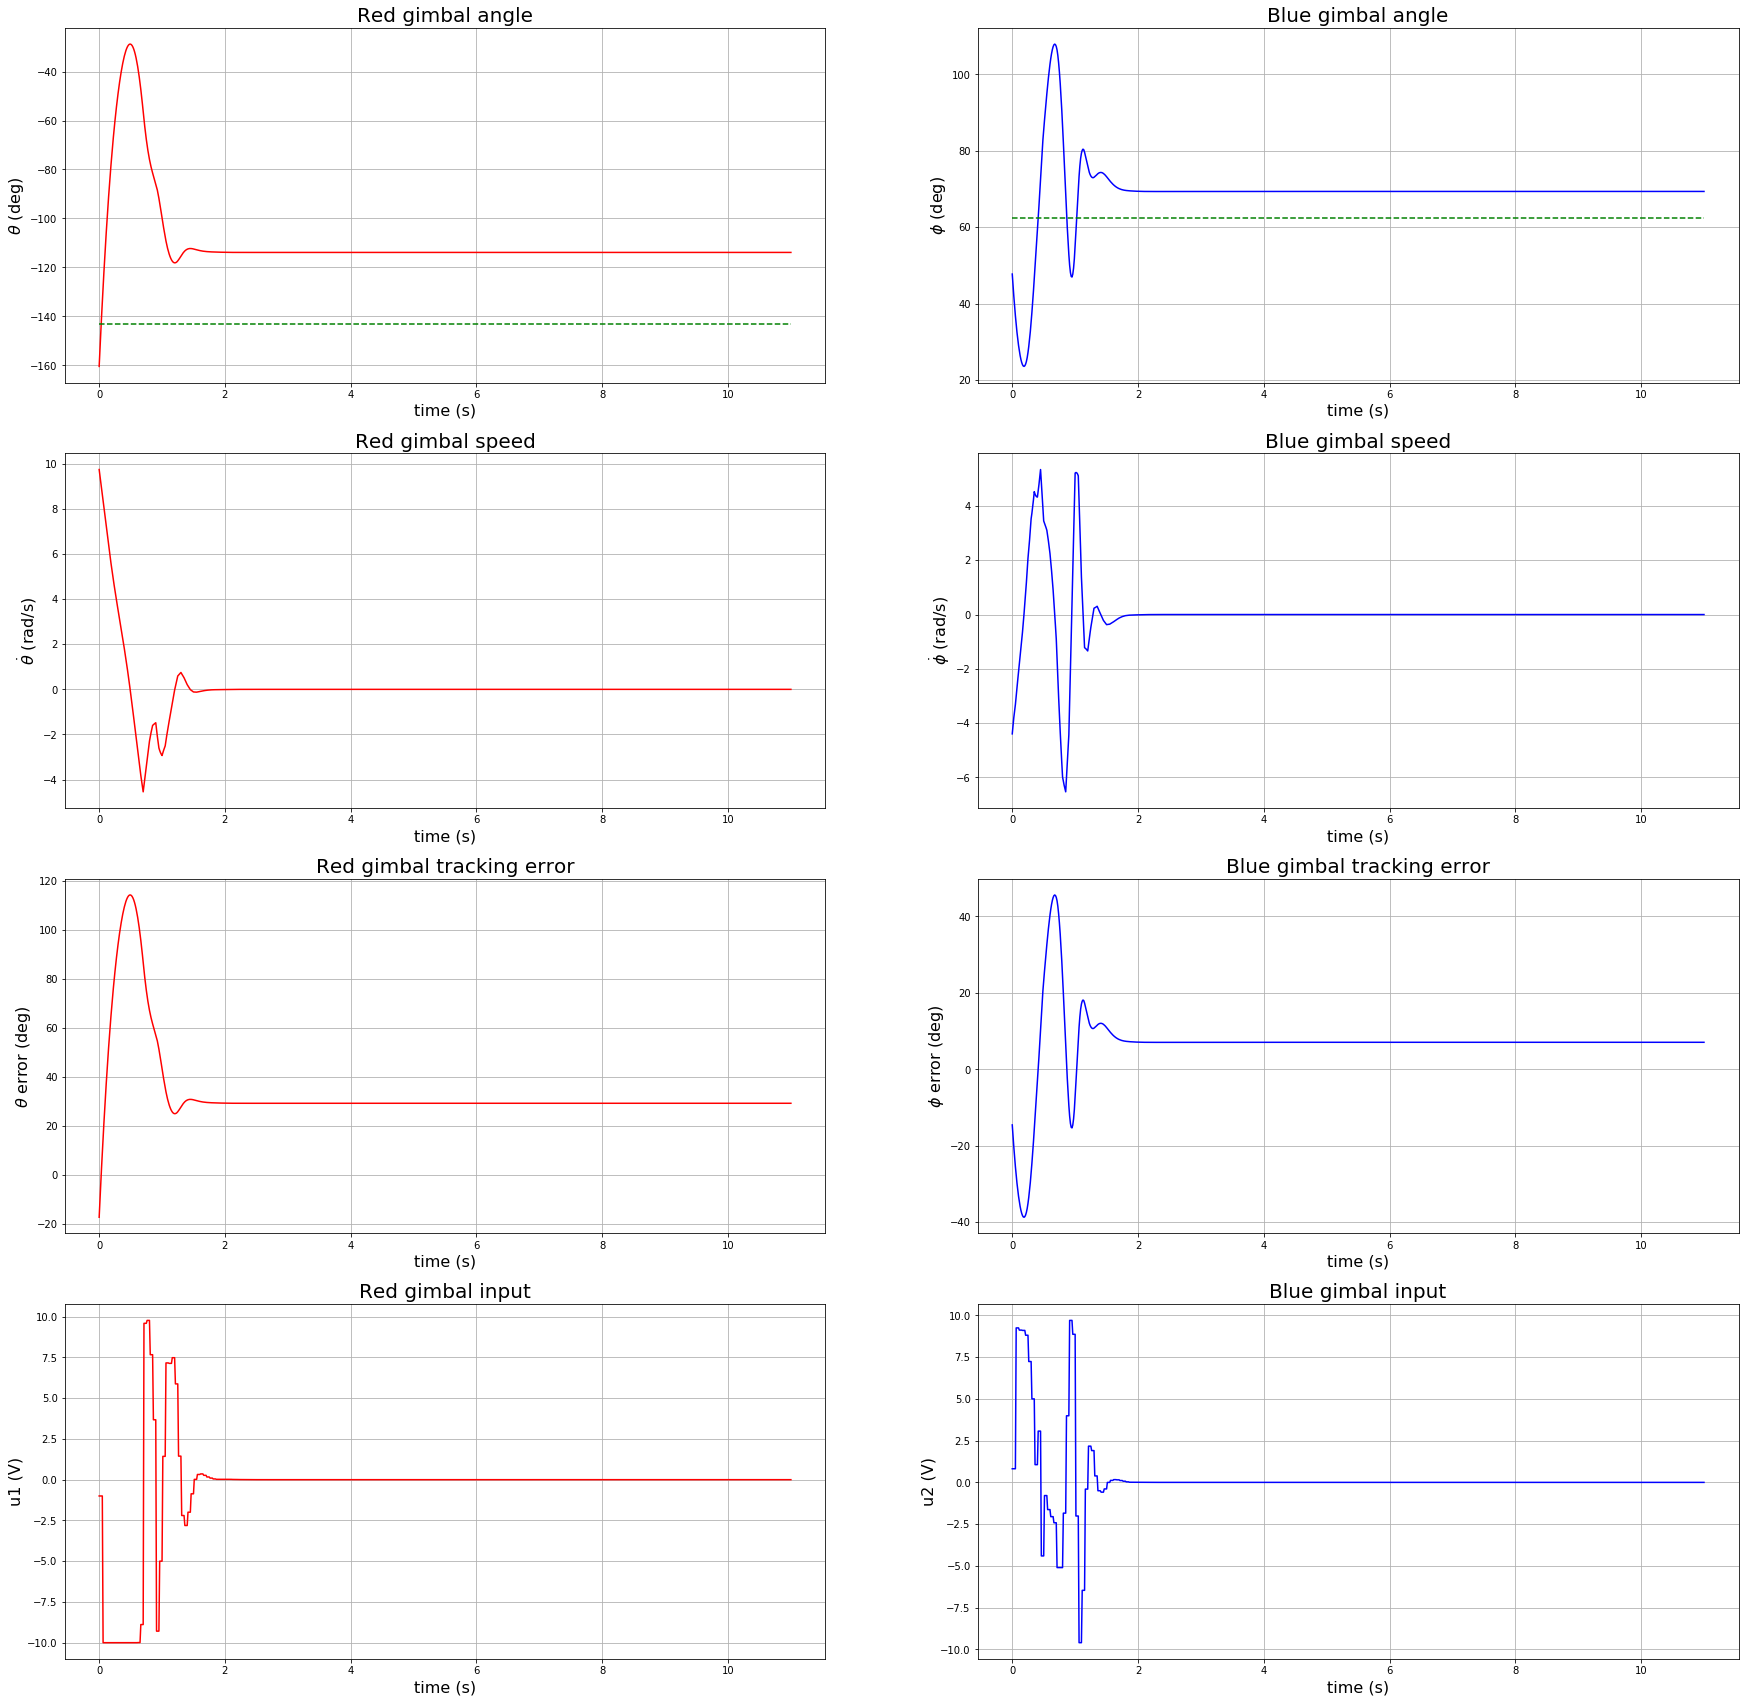

In [3]:
plot_test(x1_eval,x2_eval,x3_eval,x4_eval,x1_ref_eval,x3_ref_eval,act,t_end)

## Evaluate control performance

In [10]:
# Single evaluation
env_name = 'gyroscopeenv-v0'
agent_path = 'ddpg_b0'
ss_bound = 0.3
metrics = evaluate_control(env_name,agent_path,ss_bound)
metrics

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


,$\theta$ MAE (rad),$\phi$ MAE (rad),$\theta$ MSSE (rad),$\phi$ MSSE (rad),$\theta$ in bounds (%),$\phi$ in bounds (%),$\theta$ unsteady (%),$\phi$ unsteady (%),$\theta$ rise time (s),$\phi$ rise time (s),$\theta$ settling time (s),$\phi$ settling time (s),u1 (V),u2 (V),u1 variation (V),u2 variation (V),Convergence time (min)
Config.,,,,,,,,,,,,,,,,,
ddpg_b0,0.586866,0.44291,0.54001,0.367145,30.5,51.5,0.0,7.0,0.186066,0.766869,1.210041,1.044782,1.718111,1.446938,0.268772,0.324769,14.706724


In [3]:
# Init dataframe
env_name = 'gyroscopeintegralenv-v0'
agent_paths = ['integral_norm_s10/']
ss_bound = 0.3

# Loop dataframe
for idx, agent_path in zip(range(len(agent_paths)),agent_paths):
    if idx == 0:
        metrics = evaluate_control(env_name,agent_path,ss_bound)
    else:
        new_metrics = evaluate_control(env_name,agent_path,ss_bound)
        metrics = metrics.append(new_metrics)

# Show
metrics

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


,$\theta$ MAE (rad),$\phi$ MAE (rad),$\theta$ MSSE (rad),$\phi$ MSSE (rad),$\theta$ in bounds (%),$\phi$ in bounds (%),$\theta$ unsteady (%),$\phi$ unsteady (%),$\theta$ rise time (s),$\phi$ rise time (s),$\theta$ settling time (s),$\phi$ settling time (s),u1 (V),u2 (V),u1 variation (V),u2 variation (V),Convergence time (min)
Config.,,,,,,,,,,,,,,,,,
integral_norm_s10/,0.661056,0.559971,0.488759,0.568524,42.5,5.0,12.0,32.0,0.498088,0.35,1.030735,1.9375,2.887029,4.023105,0.650895,1.066619,15.70701
